In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
from tensorflow.keras.models import model_from_json
from tensorflow.keras import layers, Model
from tensorflow.keras import optimizers

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

In [2]:
experi = pd.read_csv('results_clip_fast/NN_experiments_with_1.0data.csv')

In [3]:
experi

,best_dev_mse,history,hyperparam
0,0.034438,"{'loss': [0.03780023071496715, 0.03564594945826598, 0.03532607702904611, 0.035095455999749794, 0...","{'opt': 'adam', 'n_fc_layers': 3, 'fc_hidden_size': 128, 'lr': 0.0010989787814038835}"
1,0.055405,"{'loss': [0.0682894563324138, 0.055378666439503246, 0.05537954226614149, 0.055375506085401656, 0...","{'opt': 'adam', 'n_fc_layers': 9, 'fc_hidden_size': 256, 'lr': 0.009956255519037047}"
2,0.035578,"{'loss': [0.03816298214085603, 0.03906464425167972, 0.03654264751253503, 0.03645873773475436, 0....","{'opt': 'adam', 'n_fc_layers': 5, 'fc_hidden_size': 256, 'lr': 0.0027567151130131764}"
3,0.034160,"{'loss': [0.03808863111331675, 0.035462712971372094, 0.03479874398030463, 0.03452258714601855, 0...","{'opt': 'adam', 'n_fc_layers': 5, 'fc_hidden_size': 256, 'lr': 0.00013274835463266625}"
4,0.034101,"{'loss': [0.03777780948970397, 0.03527689395178865, 0.0347452422028207, 0.03446452092322372, 0.0...","{'opt': 'adam', 'n_fc_layers': 6, 'fc_hidden_size': 256, 'lr': 0.00015098430411261945}"
5,0.034087,"{'loss': [0.03948766780578871, 0.03551472651930463, 0.034760506353734726, 0.0345044963590026, 0....","{'opt': 'adam', 'n_fc_layers': 4, 'fc_hidden_size': 256, 'lr': 0.0001719005300640313}"
6,0.036972,"{'loss': [0.03984790389056129, 0.04067764198132864, 0.04881715442540219, 0.038046272406693595, 0...","{'opt': 'adam', 'n_fc_layers': 5, 'fc_hidden_size': 128, 'lr': 0.0061888078205711025}"
7,0.034662,"{'loss': [0.04181354673418933, 0.03590667329936295, 0.03550578925217305, 0.035307600370742265, 0...","{'opt': 'adam', 'n_fc_layers': 2, 'fc_hidden_size': 64, 'lr': 0.0009610649704438393}"
8,0.034233,"{'loss': [0.07123859672389149, 0.037767424063473186, 0.03599011097171877, 0.035455880332248106, ...","{'opt': 'adam', 'n_fc_layers': 2, 'fc_hidden_size': 64, 'lr': 0.00017789783965197324}"
9,0.034203,"{'loss': [0.03854871962881754, 0.03522967500080559, 0.03474827440966666, 0.03447003163149293, 0....","{'opt': 'adam', 'n_fc_layers': 6, 'fc_hidden_size': 256, 'lr': 0.00017137298258081262}"


In [4]:
experi = experi.sort_values('best_dev_mse', axis=0)

## load the best model to analyze

In [5]:
# best = experiments.loc[experiments['best_dev_mse'] == min(experiments['best_dev_mse'])]
best = experi.iloc[:1,:]
best

,best_dev_mse,history,hyperparam
31,0.033869,"{'loss': [0.0380949732641497, 0.03561481120763591, 0.03508129053298055, 0.03482019023568477, 0.0...","{'opt': 'adam', 'n_fc_layers': 6, 'fc_hidden_size': 64, 'lr': 0.0002933489044301552}"


In [6]:
hyp_str = best['hyperparam'].to_list()[0]
hyp = hyp_str.replace("'", "\"")
hyp_params = json.loads(hyp)
hyp_params

{'fc_hidden_size': 64,
 'lr': 0.0002933489044301552,
 'n_fc_layers': 6,
 'opt': 'adam'}

In [7]:
10** -4

0.0001

In [8]:
h_str = best['history'].to_list()[0]
history = h_str.replace("'", "\"")
hist = json.loads(history)

hist_df = pd.DataFrame(data=hist)
hist_df['epoch'] = range(0, len(hist_df))

best_detail = hist_df.loc[hist_df['val_loss'] == min(hist_df['val_loss'])]
best_detail

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
32,0.03342,0.033421,0.033869,0.033869,32


In [9]:
Xtrain = np.load('encoded_data_clip_fast/Xtrain.npy')
Xdev = np.load('encoded_data_clip_fast/Xdev.npy')
Xtest = np.load('encoded_data_clip_fast/Xtest.npy')

ytrain = np.load('encoded_data_clip_fast/ytrain.npy')
ydev = np.load('encoded_data_clip_fast/ydev.npy')
ytest = np.load('encoded_data_clip_fast/ytest.npy')

In [11]:
yyoung = np.load('encoded_data_clip_fast/yyoung.npy')

In [12]:
model_n = best.index[0]
# model_n = model_n[0]
model_n

31

In [13]:
# load json and create model
model_path = 'results_clip_fast/NNmodel_{}_with_1.0data.json'.format(model_n)
print(model_path)
weights_path = 'results_clip_fast/NNmodel_{}_with_1.0data_weights.hdf5'.format(model_n)

json_file = open(model_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)
print("Loaded model from disk")

# evaluate loaded model on test data
if hyp_params['opt'] == 'adam':
    opt = optimizers.Adam(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'rmsprop':
    opt = optimizers.RMSprop(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'sgd':
    opt = optimizers.SGD(lr=hyp_params['lr'])
else:
    raise ValueError('Unknown optimizer: {}'.format(hyp_params['opt']))

loaded_model.compile(loss='mean_squared_error', optimizer=opt,
                     metrics=['mean_squared_error'])

W0910 17:59:36.969269 140497354442496 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0910 17:59:36.970505 140497354442496 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0910 17:59:36.971586 140497354442496 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ze

results_clip_fast/NNmodel_31_with_1.0data.json
Loaded model from disk


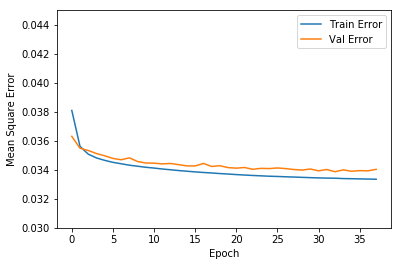

In [14]:
def plot_history(hist_df):
    

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist_df['epoch'], hist_df['mean_squared_error'],
           label='Train Error')
    plt.plot(hist_df['epoch'], hist_df['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0.03,0.045])
    plt.legend()
    plt.savefig('plots/bestNNmodel_learning_curve.png')
    plt.show()


plot_history(hist_df)



In [15]:
train_pred = loaded_model.predict(Xtrain)
train_mse = mean_squared_error(ytrain, train_pred)
train_mse

0.03323900551482296

In [16]:
dev_pred = loaded_model.predict(Xdev)
dev_mse = mean_squared_error(ydev, dev_pred)
dev_mse

0.03386870990906482

In [17]:
test_pred = loaded_model.predict(Xtest)
test_mse = mean_squared_error(ytest, test_pred)
test_mse

0.03352065567543133

In [18]:
np.sqrt(test_mse)

0.18308647048712073

In [19]:
Xdev.shape

(13863, 446)

In [20]:
cols = pd.read_csv('encoded_data_clip_fast/encoded_columns_name.txt', header=None)

In [21]:
cols

,0
0,AllupSeats
1,EXOSubscriptionsCount
2,OD4BSubscriptionsCount
3,SfBSubscriptionsCount
4,TeamsSubscriptionsCount
5,PaidCount
6,ProjectSubscriptionsCount
7,SPOSubscriptionsCount
8,ActivatedSubscriptionTotalCount
9,VisioSubscriptionsCount


In [22]:
len(cols)

446

## Simply use mean to predict the usage, what's the mse? 

In [42]:
ydev.shape

(13863, 12)

In [43]:
ytrain.shape

(1358666, 12)

In [50]:
mean_pred = np.mean(ytrain, axis=0)
mean_pred.shape

(12,)

In [51]:
mean_pred

array([0.62110144, 0.05365597, 0.00677421, 0.02766687, 0.08304186,
       0.01155995, 0.17820833, 0.18897241, 0.03390856, 0.35767573,
       0.63373398, 0.41932332])

In [52]:
mean_mse = np.mean(np.square(ydev - mean_pred))
mean_mse

0.05538892776643455

In [53]:
# mean_rmse = np.sqrt(mean_mse)
# mean_rmse

In [54]:
mean_mse_multi = np.mean(np.square(ydev - mean_pred), axis=0)
mean_mse_multi

array([0.14211877, 0.02713775, 0.00266528, 0.0142362 , 0.03594329,
       0.00327788, 0.04792561, 0.05410649, 0.00841748, 0.09938194,
       0.12780398, 0.10165247])

In [55]:
# mean_rmse_multi = np.sqrt(mean_mse_multi)
# mean_rmse_multi

In [56]:
mean_mse_multi = mean_mse_multi.reshape((12,1))
# mean_rmse_multi = mean_rmse_multi.reshape((12,1))

# mean_prediction_data = np.concatenate([])
    
# mean_predict = pd.DataFrame(data=[mean_mse_workload_, mean_rmse_workload_], columns=['mse', 'rmse'], index=outputs_name)

# print(mean_predict)

## Take a look at the MSE for each workload (on dev set)

In [57]:
# test_mse_multi = mean_squared_error(ytest, test_pred, multioutput='raw_values')
# test_mse_multi

In [59]:
dev_pred = loaded_model.predict(Xdev)
dev_mse_multi = mean_squared_error(ydev, dev_pred, multioutput='raw_values')
dev_mse_multi

array([0.06631871, 0.0205479 , 0.00227506, 0.01218551, 0.02790262,
       0.00295267, 0.02956188, 0.03286767, 0.00660836, 0.07378304,
       0.06183287, 0.06958822])

In [58]:
# dev_rmse_multi = np.sqrt(dev_mse_multi)
# dev_rmse_multi

In [60]:
outputs_name = [
    'MAR_exchange',
 'MAR_sharepoint',
 'MAR_skype',
 'MAR_teams',
 'MAR_od4b',
 'MAR_onenote',
 'MAR_word',
 'MAR_excel',
 'MAR_powerpoint',
 'MAR_outlook',
 'MAR_eslt',
 'MAR_officeclient'
]

In [61]:
dev_outputs_mse = {}

for i, n in enumerate(outputs_name):
    
    dev_outputs_mse[n] = dev_mse_multi[i]
    
s = pd.Series(dev_outputs_mse).sort_values()

print(s)

MAR_skype           0.002275
MAR_onenote         0.002953
MAR_powerpoint      0.006608
MAR_teams           0.012186
MAR_sharepoint      0.020548
MAR_od4b            0.027903
MAR_word            0.029562
MAR_excel           0.032868
MAR_eslt            0.061833
MAR_exchange        0.066319
MAR_officeclient    0.069588
MAR_outlook         0.073783
dtype: float64


In [62]:
dev_mse_multi = dev_mse_multi.reshape((12,1))
mean_mse_multi = mean_mse_multi.reshape((12,1))
# test_mse_multi = test_mse_multi.reshape((12,1))
mse_data = np.concatenate((dev_mse_multi, mean_mse_multi), axis=1)

In [63]:
mse_multi_df = pd.DataFrame(data=mse_data, columns=['NN_prediction_mse', 'Mean_prediction_mse'],
                           index=outputs_name)

In [64]:
mse_multi_df

,NN_prediction_mse,Mean_prediction_mse
MAR_exchange,0.066319,0.142119
MAR_sharepoint,0.020548,0.027138
MAR_skype,0.002275,0.002665
MAR_teams,0.012186,0.014236
MAR_od4b,0.027903,0.035943
MAR_onenote,0.002953,0.003278
MAR_word,0.029562,0.047926
MAR_excel,0.032868,0.054106
MAR_powerpoint,0.006608,0.008417
MAR_outlook,0.073783,0.099382


## How is the performance on purchased workloads?

In [65]:
features = pd.read_csv('encoded_data_clip_fast/encoded_columns_name.txt', delimiter='\t', header=None)
features.columns = ['cols_name']

In [66]:
len(features)

446

In [67]:
features[:80]

,cols_name
0,AllupSeats
1,EXOSubscriptionsCount
2,OD4BSubscriptionsCount
3,SfBSubscriptionsCount
4,TeamsSubscriptionsCount
5,PaidCount
6,ProjectSubscriptionsCount
7,SPOSubscriptionsCount
8,ActivatedSubscriptionTotalCount
9,VisioSubscriptionsCount


In [68]:
total_index = features.loc[features['cols_name'] == 'PaidCount'].index
exo_index = features.loc[features['cols_name'] == 'PaidEXOSeats'].index
spo_index = features.loc[features['cols_name'] == 'PaidSPOSeats'].index
od4b_index = features.loc[features['cols_name'] == 'PaidOD4BSeats'].index
teams_index = features.loc[features['cols_name'] == 'PaidTeamsSeats'].index
sfb_index = features.loc[features['cols_name'] == 'PaidSFBSeats'].index
office_index = features.loc[features['cols_name'] == 'PaidOfficeSeats'].index

In [69]:
Xdev[:,exo_index].shape


(13863, 1)

In [70]:
# outputs_name

In [71]:
mask_exo = np.where(Xdev[:,exo_index] > 0, 1, 0)
mask_spo = np.where(Xdev[:,spo_index] > 0, 1, 0)
mask_sfb = np.where(Xdev[:,sfb_index] > 0, 1, 0)
mask_teams = np.where(Xdev[:,teams_index] > 0, 1, 0)
mask_od4b = np.where(Xdev[:,od4b_index] > 0, 1, 0)
mask_eslt = np.where(Xdev[:,total_index] > 0, 1, 0)
mask_office = np.where(Xdev[:,office_index] > 0, 1, 0)

mask_office_all = np.ones((Xdev.shape[0], 5))

for i in range(5):
    mask_office_all[:,i] = mask_office[:,0]
    
mask = np.concatenate([mask_exo, mask_spo, mask_sfb, mask_teams, mask_od4b, 
                       mask_office_all, mask_eslt, mask_office], axis=1)

In [72]:
squared_error = np.square(dev_pred - ydev)
squared_error.shape

(13863, 12)

In [73]:
purchased_workload_mse_multi = np.sum(mask * squared_error, axis=0) / np.sum(mask, axis=0)

In [74]:
purchased_workload_mse_multi

array([0.05208187, 0.02851581, 0.00547811, 0.0233145 , 0.01309813,
       0.01279283, 0.07638367, 0.09331965, 0.02736478, 0.08864018,
       0.04112852, 0.06184885])

In [81]:
# calculate std for purchased workloads, which is equal to the rmse of mean prediction 
# (simple use each workload's mean to predict)
purchased_wl_mean_prediction_outputs = np.sum(mask * ydev, axis=0, keepdims=True) / np.sum(mask, axis=0, keepdims=True)
squared_error = np.square(purchased_wl_mean_prediction_outputs - ydev)
purchased_wl_mean_prediction_mse_multi = np.sum(squared_error * mask, axis=0) / np.sum(mask, axis=0)
# purchased_wl_mean_prediction_rmse = np.sqrt(purchased_wl_mean_prediction_mse_multi)
# purchased_wl_mean_prediction_rmse
purchased_wl_mean_prediction_mse_multi

array([0.07397342, 0.03708654, 0.00603224, 0.02665438, 0.01687018,
       0.00270622, 0.10939325, 0.12466755, 0.06194719, 0.12287435,
       0.10708938, 0.08431257])

In [82]:
purchased_workload_mse = np.mean(purchased_workload_mse_multi)
purchased_workload_mse

0.043663907773666

In [84]:
purchased_wl_mean_prediction_mse = np.mean(purchased_wl_mean_prediction_mse_multi)
purchased_wl_mean_prediction_mse

0.06446727318431889

In [79]:
# purchased_workload_rmse_multi = np.sqrt(purchased_workload_mse_multi)
# purchased_workload_rmse_multi

In [80]:
# purchased_workload_std_multi = purchased_wl_mean_prediction_rmse
# purchased_workload_std_multi.shape

In [85]:
# purchased_workload_std_multi = purchased_workload_std_multi.reshape((12,1))
# rmse_std_multi = (purchased_workload_rmse_multi / purchased_workload_std_multi).reshape((12,1))
purchased_wl_mean_prediction_mse_multi = purchased_wl_mean_prediction_mse_multi.reshape((12,1))
purchased_workload_mse_multi = purchased_workload_mse_multi.reshape((12,1))

purchased_wl_data = np.concatenate((purchased_workload_mse_multi,
                                    purchased_wl_mean_prediction_mse_multi), axis=1)

In [87]:
purchased_wl_mse_multi_df = pd.DataFrame(data=purchased_wl_data, columns=['NN_prediction_mse', 'Mean_prediction_mse'], 
                                         index=outputs_name)
purchased_wl_mse_multi_df

,NN_prediction_mse,Mean_prediction_mse
MAR_exchange,0.052082,0.073973
MAR_sharepoint,0.028516,0.037087
MAR_skype,0.005478,0.006032
MAR_teams,0.023315,0.026654
MAR_od4b,0.013098,0.016870
MAR_onenote,0.012793,0.002706
MAR_word,0.076384,0.109393
MAR_excel,0.093320,0.124668
MAR_powerpoint,0.027365,0.061947
MAR_outlook,0.088640,0.122874


In [133]:
df = pd.read_csv('raw_data/TenantInfo-and-usage_shuffled_inf_clip_mature.csv'#, nrows=100
                )
df['AR_onenote_06'].describe()

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (142,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count    1.386392e+06
mean     1.154917e-02
std      5.819509e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: AR_onenote_06, dtype: float64

## Clustering the mature tenants

In [73]:
loaded_model.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 446)]             0         
_________________________________________________________________
dense_140 (Dense)            (None, 128)               57216     
_________________________________________________________________
dense_141 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_142 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_143 (Dense)            (None, 12)                1548      
Total params: 91,788
Trainable params: 91,788
Non-trainable params: 0
_________________________________________________________________


In [74]:
model = loaded_model
last_hiden_layer_index = hyp_params['n_fc_layers']
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(index=last_hiden_layer_index).output)

intermediate_output = intermediate_layer_model.predict(Xdev)

In [75]:
intermediate_output.shape

(13863, 128)

In [76]:
X = intermediate_output
# sc = StandardScaler()  
# X = sc.fit_transform(intermediate_output)

distance_matrix = pairwise_distances(X, X, metric='cosine', n_jobs=-1)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300, metric="precomputed")
tsne_results = tsne.fit_transform(distance_matrix)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 13863 samples in 0.186s...
[t-SNE] Computed neighbors for 13863 samples in 3.018s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13863
[t-SNE] Computed conditional probabilities for sample 2000 / 13863
[t-SNE] Computed conditional probabilities for sample 3000 / 13863
[t-SNE] Computed conditional probabilities for sample 4000 / 13863
[t-SNE] Computed conditional probabilities for sample 5000 / 13863
[t-SNE] Computed conditional probabilities for sample 6000 / 13863
[t-SNE] Computed conditional probabilities for sample 7000 / 13863
[t-SNE] Computed conditional probabilities for sample 8000 / 13863
[t-SNE] Computed conditional probabilities for sample 9000 / 13863
[t-SNE] Computed conditional probabilities for sample 10000 / 13863
[t-SNE] Computed conditional probabilities for sample 11000 / 13863
[t-SNE] Computed conditional probabilities for sample 12000 / 13863
[t-SNE] Computed conditional probabilities for sam

In [77]:
# data = pd.DataFrame(data=X, columns=[i for i in range(intermediate_output.shape[1])])
data = pd.read_csv('encoded_data_clip_fast/dev_set_raw_data.csv')
cols = data.columns.tolist()

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
cols[-12:]

['AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06']

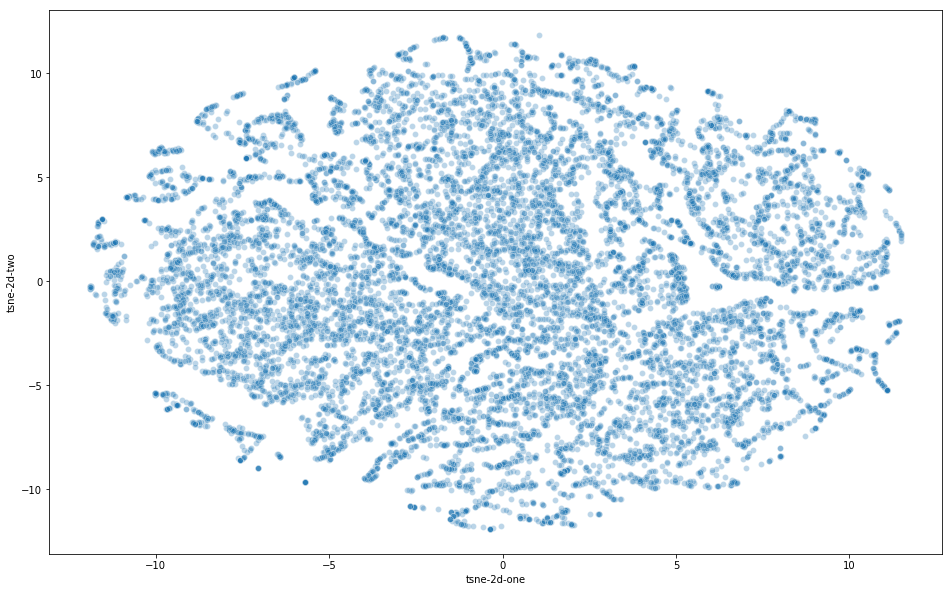

In [79]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="target",
    #palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
# plt.savefig('plots/1per-cluster-tsne-profile.png')

In [80]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29135054 0.24852705 0.05743065]


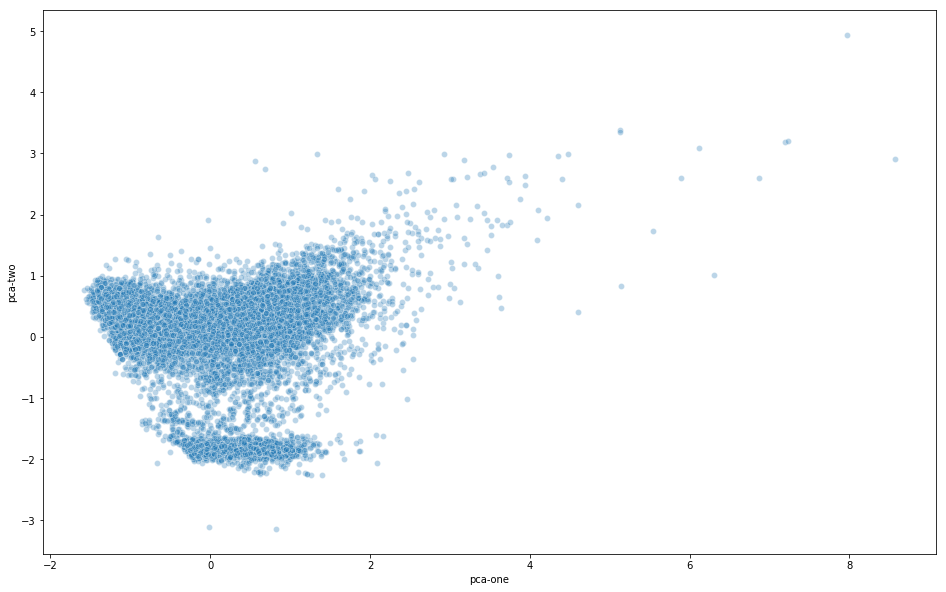

In [81]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
#     hue="target",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
# plt.savefig('plots/1per-cluster-pca-profile.png')

In [147]:
# model_n = best.index
# model_n = model_n[0]
model_n = 0

In [148]:
# load json and create model
model_path = 'results_clip_fast/NNmodel_{}_with_1.0data.json'.format(model_n)
print(model_path)
weights_path = 'results_clip_fast/NNmodel_{}_with_1.0data_weights.hdf5'.format(model_n)

json_file = open(model_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)
print("Loaded model from disk")

# evaluate loaded model on test data
if hyp_params['opt'] == 'adam':
    opt = optimizers.Adam(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'rmsprop':
    opt = optimizers.RMSprop(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'sgd':
    opt = optimizers.SGD(lr=hyp_params['lr'])
else:
    raise ValueError('Unknown optimizer: {}'.format(hyp_params['opt']))

loaded_model.compile(loss='mean_squared_error', optimizer=opt,
                     metrics=['mean_squared_error'])

results_clip_fast/NNmodel_0_with_1.0data.json
Loaded model from disk


In [149]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 446)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               57216     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                36    

In [150]:
model = loaded_model
last_hiden_layer_index = 5
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(index=last_hiden_layer_index).output)

intermediate_output = intermediate_layer_model.predict(Xdev)

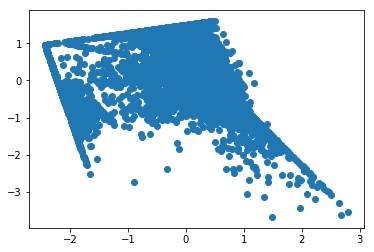

In [155]:
plt.scatter(x=intermediate_output[:,0], y=intermediate_output[:,1])

In [154]:
intermediate_output[0]

array([0.33166814, 1.0634568 ], dtype=float32)

## Demo

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle as pkl
import joblib
import encoding_data

In [250]:
examples = pd.read_csv('data/dev_set_raw_data.csv')
#examples.head(10)

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (142,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [251]:
examples.head()

,TenantId,CreatedDate,CreateDateOfFirstSubscription,CountryCode,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,Languange,DataCenterInstance,DataCenterModel,HasEXO,HasSPO,HasOD4B,HasSfB,HasYammer,HasTeams,HasTeamsFreemium,HasKaizala,HasProPlus,HasAADP,HasAIP,HasAATP,HasIntune,HasMCAS,HasWDATP,HasAudioConference,HasPhoneSystem,HasEdiscovery,HasCompliance,HasThreatIntelligence,HasCustomerLockbox,HasOATP,HasAADPP2,HasAIPP2,HasWindows,HasO365CAS,HasCASDiscovery,HasPAM,HasPowerBI,HasPowerBIPremium,HasPowerBIPro,HasVisio,HasProject,HasNonTrial,HasSubscription_AllCounted,WithoutTenantAdmin,OrgNameEnteredInCommerce,HasPartnerTenants,SignupLocationInfo_Country,SignupLocationInfo_CountryCode,SignupLocationInfo_Region,Subscriptions_HasPaidSeats,TopParents_AreaName,TopParents_BigAreaName,TopParents_CountryCode,TopParents_Industry,TopParents_RegionName,TopParents_SegmentGroup,TopParents_SubRegionName,TopParents_VerticalName,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,HasUsGovCloudOffer,FirstPaidEXOStartDate,FirstPaidSPOStartDate,FirstPaidOD4BStartDate,FirstPaidSfBStartDate,FirstPaidYammerStartDate,FirstPaidTeamsStartDate,FirstPaidProPlusStartDate,FirstPaidAADPStartDate,FirstPaidAIPStartDate,FirstPaidAATPStartDate,FirstPaidIntuneStartDate,FirstPaidMCASStartDate,FirstPaidO365E5SkuStartDate,FirstPaidM365E5SkuStartDate,FirstPaidEMSE5SkuStartDate,Has1YearFreeDomain,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officeclient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_eslt_05,AR_officeclient_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06
0,8A06EA26-549C-4DDF-AF9E-DE3D492F9F43,11/28/2011 5:30:16 PM,8/9/2017 12:00:00 AM,US,18,2,2,1,1,18,1,2,4,0,0,4,en,Global|GoLocal,PublicCloud|GoLocal,True,True,True,True,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [252]:
examples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Columns: 227 entries, TenantId to AR_officeclient_06
dtypes: bool(40), float64(91), int64(64), object(32)
memory usage: 20.3+ MB


In [255]:
example_df = examples.iloc[1:2, :].copy()

In [ ]:
df_X, df_y = encoding_data.separate_input_output_cols(example_df, predict_ahead=0, previous_usage=0)

In [257]:
X_scal, _ = encoding_data.encode_dev_test_inputs(df_X, dv, scaler)

Starting to encode dev or test inputs...



KeyboardInterrupt



In [247]:
324 + 62 + 55 + 40 + 8

0.24.2


489

In [253]:
dv_file = '/data/home/t-chepan/projects/MS-intern-project/data/vectorizer.pkl' 
scaler_file = '/data/home/t-chepan/projects/MS-intern-project/data/scaler.pkl'
# default_example = {}
dv = joblib.load(dv_file)
scaler = joblib.load(scaler_file)

def encode_input(df, dv, scaler):
    df_X, df_y = encoding_data.separate_input_output_cols(df, predict_ahead=0, previous_usage=0)
    X_scal, _ = encoding_data.encode_dev_test_inputs(df_X, dv, scaler)
    print(X_scal.shape)
    return X_scal, df_y

def decode_output(output, names):
    usage_pattern = {}
    for i, name in enumerate(names):
        usage_pattern[name] = output[i]
    return usage_pattern

def predict_usage_pattern(model, example_df, dv, workload_names, scaler):
    example_input, df_y = encode_input(example_df, dv, scaler)
    output = model.predict(example_input)
    usage_pattern = decode_output(output[0], workload_names)
    return usage_pattern, df_y


# def display(usage_pattern):
#     for k, v in usage_pattern.items():
#         print('workload: {}, usage: {}'.format(k, v))
        

In [9]:
example_df = examples.iloc[1:2, :].copy()

usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
usage_pattern

# display(usage_pattern)
# lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.bar(x, y)
# plt.xticks(rotation=90)
# plt.show()

NameError: name 'examples' is not defined

In [131]:
set(df_train['TopParents_Industry'])

{'0',
 'Automotive',
 'Banking & Capital Markets',
 'Chemicals & Agrochemicals',
 'Consumer Goods',
 'Defense & Intelligence',
 'Discrete Manufacturing',
 'Energy',
 'Forestry & Fishing',
 'Gaming',
 'Health Payor',
 'Health Provider',
 'Higher Education',
 'Insurance',
 'Libraries & Museums',
 'Local Regional Government',
 'Media & Entertainment',
 'National Government',
 'Nonprofit',
 'Other - Unsegmented',
 'Partner Professional Services',
 'Pharmaceuticals',
 'Primary & Secondary Edu/K-12',
 'Professional Services',
 'Retailers',
 'Smart Spaces',
 'Telecommunications',
 'Travel & Transportation'}

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.6078834, 'AR_powerpoint_06': -0.030275349, 'AR_word_06': -0.0019260347, 'AR_exchange_06': 0.72613996, 'AR_eslt_06': 0.9676844, 'AR_sharepoint_06': 1.2546641, 'AR_teams_06': 0.02764214, 'AR_officeclient_06': 0.6788437, 'AR_skype_06': -0.021691568, 'AR_excel_06': -0.074682474, 'AR_od4b_06': 0.2589141, 'AR_onenote_06': -0.009499604}


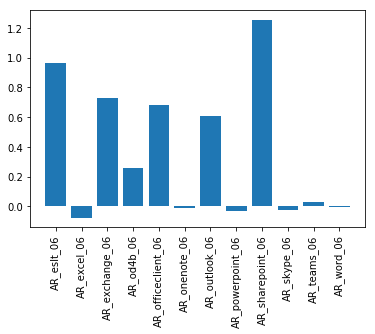

In [139]:
example_df['AllupSeats'] = 200
example_df['CountryCode'] = 'US'
# example_df['TopParents_Industry'] = '0'

example_df['TopParents_Industry'] = 'Telecommunications'


usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.32676965, 'AR_powerpoint_06': 0.03203911, 'AR_word_06': 0.14829825, 'AR_exchange_06': 0.84699994, 'AR_eslt_06': 0.83992803, 'AR_sharepoint_06': 0.134666, 'AR_teams_06': 0.037909556, 'AR_officeclient_06': 0.3452013, 'AR_skype_06': 0.020363506, 'AR_excel_06': 0.16442612, 'AR_od4b_06': 0.07195382, 'AR_onenote_06': 0.009282259}


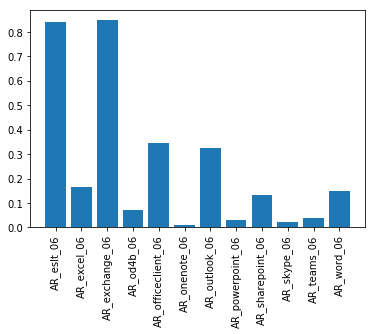

In [141]:
example_df['AllupSeats'] = 200
example_df['PaidPhoneSystemSeats'] = 200
example_df['CountryCode'] = 'LU'
example_df['TopParents_Industry'] = 'Health Provider'
# example_df['TopParents_Industry'] = 'Telecommunications'


usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.5584716, 'AR_powerpoint_06': 0.036912292, 'AR_word_06': 0.21682893, 'AR_exchange_06': 0.7675637, 'AR_eslt_06': 0.87325585, 'AR_sharepoint_06': 1.0127981, 'AR_teams_06': 0.035058863, 'AR_officeclient_06': 0.63702923, 'AR_skype_06': 0.026213381, 'AR_excel_06': 0.20309034, 'AR_od4b_06': 0.13962746, 'AR_onenote_06': 0.00789956}


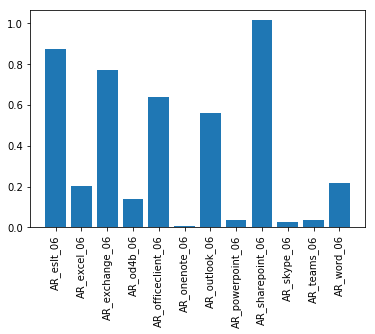

In [134]:
example_df['AllupSeats'] = 20
example_df['CountryCode'] = 'US'
example_df['TopParents_Industry'] = 'Banking & Capital Markets'

usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [95]:
## original default example
example_df = df_train.iloc[2:3, :].copy()
example_df

,TenantId,CreatedDate,CreateDateOfFirstSubscription,CountryCode,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,Languange,DataCenterInstance,DataCenterModel,HasEXO,HasSPO,HasOD4B,HasSfB,HasYammer,HasTeams,HasTeamsFreemium,HasKaizala,HasProPlus,HasAADP,HasAIP,HasAATP,HasIntune,HasMCAS,HasWDATP,HasAudioConference,HasPhoneSystem,HasEdiscovery,HasCompliance,HasThreatIntelligence,HasCustomerLockbox,HasOATP,HasAADPP2,HasAIPP2,HasWindows,HasO365CAS,HasCASDiscovery,HasPAM,HasPowerBI,HasPowerBIPremium,HasPowerBIPro,HasVisio,HasProject,HasNonTrial,HasSubscription_AllCounted,WithoutTenantAdmin,OrgNameEnteredInCommerce,HasPartnerTenants,SignupLocationInfo_Country,SignupLocationInfo_CountryCode,SignupLocationInfo_Region,Subscriptions_HasPaidSeats,TopParents_AreaName,TopParents_BigAreaName,TopParents_CountryCode,TopParents_Industry,TopParents_RegionName,TopParents_SegmentGroup,TopParents_SubRegionName,TopParents_VerticalName,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,HasUsGovCloudOffer,FirstPaidEXOStartDate,FirstPaidSPOStartDate,FirstPaidOD4BStartDate,FirstPaidSfBStartDate,FirstPaidYammerStartDate,FirstPaidTeamsStartDate,FirstPaidProPlusStartDate,FirstPaidAADPStartDate,FirstPaidAIPStartDate,FirstPaidAATPStartDate,FirstPaidIntuneStartDate,FirstPaidMCASStartDate,FirstPaidO365E5SkuStartDate,FirstPaidM365E5SkuStartDate,FirstPaidEMSE5SkuStartDate,Has1YearFreeDomain,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officeclient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_eslt_05,AR_officeclient_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06
4,4022B92B-EA9F-497B-985D-D335EB3CE735,10/31/2013 11:30:36 AM,10/31/2013 12:00:00 AM,US,12,1,0,0,0,12,0,0,2,0,0,2,en,Global|GoLocal,PublicCloud|GoLocal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [96]:
example_df['CountryCode'] = 'UK'

## Prepare the display table for agents & Analyze on the test set

In [21]:
df = pd.read_csv('encoded_data_clip_fast/dev_set_raw_data.csv'#, nrows=100
                )

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# df_test.to_csv('data_8.21/df_test.csv', index=False)

In [23]:
outputs_name = [
     'AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06'
]

In [24]:
display_cols = ['TenantId', 'CountryCode', 'TopParents_Industry','AllupSeats', 'PaidCount',
                'PaidEXOSeats', 'PaidSPOSeats', 'PaidOD4BSeats',
                'PaidTeamsSeats', 'PaidSFBSeats', 'PaidOfficeSeats'] + outputs_name

In [25]:
df_display = df.loc[:, display_cols]

In [26]:
df_display.shape

(13863, 23)

In [27]:
for i in range(len(dev_pred[1])):
    col_name = outputs_name[i] +'_delta'
    df_display[col_name] = test_pred[:,i] - ytest[:,i]

In [28]:
df_display.head()

,TenantId,CountryCode,TopParents_Industry,AllupSeats,PaidCount,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06,AR_exchange_06_delta,AR_sharepoint_06_delta,AR_skype_06_delta,AR_teams_06_delta,AR_od4b_06_delta,AR_onenote_06_delta,AR_word_06_delta,AR_excel_06_delta,AR_powerpoint_06_delta,AR_outlook_06_delta,AR_eslt_06_delta,AR_officeclient_06_delta
0,739DF237-2090-4320-87CE-2C72840EC45B,US,0,2,1,1,0,0,0,0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.098356,0.003125,0.002423,0.005244,-0.004103,-0.004633,0.038875,0.045495,0.010194,0.046281,0.096122,0.052416
1,C35CA9A2-1D59-4661-9191-381A2948F7DA,US,Other - Unsegmented,2,2,0,0,2,0,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.850000,0.625000,0.175000,1.000000,0.000000,1.000000,0.000584,0.156347,0.010368,0.060361,0.240288,0.040567,0.047293,-0.074162,0.027423,0.083640,0.004364,-0.214555
2,BDB4922B-DE46-4333-A0A4-5E9C37022894,FR,0,13,13,13,0,0,0,0,0.0,0.676923,0.0,0.0,0.000000,0.000000,0.0,0.053846,0.115385,0.003846,0.100000,0.676923,0.126923,-0.081229,-0.157606,0.150625,-0.426357,0.059288,0.037620,0.066230,0.156166,0.099999,-0.068979,-0.022006,-0.065354
3,D092E6B3-C263-460C-9558-F112D821A80B,US,0,2,1,1,0,0,0,0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.050000,0.000000,0.000000,0.900000,1.000000,0.900000,-0.002047,-0.005911,0.002186,-0.009430,-0.270900,0.008581,0.040053,0.191132,0.043545,0.146624,-0.270852,0.123043
4,9A5D99A1-056F-4B13-B088-CB9C944A45E1,CH,Smart Spaces,14,14,14,14,14,14,14,0.0,0.771429,0.0,0.0,0.064286,0.007143,0.0,0.157143,0.189286,0.010714,0.378571,0.771429,0.396429,0.011740,0.022717,0.005005,0.022494,0.042736,0.006115,-0.092543,0.030560,0.018618,-0.040267,0.019061,-0.061013


In [29]:
delta_cols = df_display.columns[-12:]

paidseats = ['PaidEXOSeats', 'PaidSPOSeats', 'PaidSFBSeats','PaidTeamsSeats',
             'PaidOD4BSeats', 'PaidOfficeSeats', 'PaidOfficeSeats','PaidOfficeSeats',
             'PaidOfficeSeats','PaidOfficeSeats','PaidCount', 'PaidOfficeSeats']

targets = list(zip(paidseats, delta_cols, outputs_name))

In [30]:
targets

[('PaidEXOSeats', 'AR_exchange_06_delta', 'AR_exchange_06'),
 ('PaidSPOSeats', 'AR_sharepoint_06_delta', 'AR_sharepoint_06'),
 ('PaidSFBSeats', 'AR_skype_06_delta', 'AR_skype_06'),
 ('PaidTeamsSeats', 'AR_teams_06_delta', 'AR_teams_06'),
 ('PaidOD4BSeats', 'AR_od4b_06_delta', 'AR_od4b_06'),
 ('PaidOfficeSeats', 'AR_onenote_06_delta', 'AR_onenote_06'),
 ('PaidOfficeSeats', 'AR_word_06_delta', 'AR_word_06'),
 ('PaidOfficeSeats', 'AR_excel_06_delta', 'AR_excel_06'),
 ('PaidOfficeSeats', 'AR_powerpoint_06_delta', 'AR_powerpoint_06'),
 ('PaidOfficeSeats', 'AR_outlook_06_delta', 'AR_outlook_06'),
 ('PaidCount', 'AR_eslt_06_delta', 'AR_eslt_06'),
 ('PaidOfficeSeats', 'AR_officeclient_06_delta', 'AR_officeclient_06')]

In [31]:
threshold = 0.05

for ps, delta, acr in targets:
    def f(row):
        if row[ps] <= 0:
            val = -1
        else:
            if row[delta] > threshold and row[acr] < 1:
                val = 1
            else:
                val = 0
        return val
    
    vals = []
    for i, row in df_display.iterrows():
        vals.append(f(row))
        
    df_display['Rec_{}'.format(acr)] = vals


In [32]:
df_display.to_csv('results_clip_fast/rec_display.csv', index=False)

In [33]:
# df_display = pd.read_csv('results_clip_fast/rec_display.csv')

In [34]:
df_display.head(15)

,TenantId,CountryCode,TopParents_Industry,AllupSeats,PaidCount,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06,AR_exchange_06_delta,AR_sharepoint_06_delta,AR_skype_06_delta,AR_teams_06_delta,AR_od4b_06_delta,AR_onenote_06_delta,AR_word_06_delta,AR_excel_06_delta,AR_powerpoint_06_delta,AR_outlook_06_delta,AR_eslt_06_delta,AR_officeclient_06_delta,Rec_AR_exchange_06,Rec_AR_sharepoint_06,Rec_AR_skype_06,Rec_AR_teams_06,Rec_AR_od4b_06,Rec_AR_onenote_06,Rec_AR_word_06,Rec_AR_excel_06,Rec_AR_powerpoint_06,Rec_AR_outlook_06,Rec_AR_eslt_06,Rec_AR_officeclient_06
0,739DF237-2090-4320-87CE-2C72840EC45B,US,0,2,1,1,0,0,0,0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.098356,0.003125,0.002423,0.005244,-0.004103,-0.004633,0.038875,0.045495,0.010194,0.046281,0.096122,0.052416,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
1,C35CA9A2-1D59-4661-9191-381A2948F7DA,US,Other - Unsegmented,2,2,0,0,2,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850000,0.625000,0.175000,1.000000,0.000000,1.000000,0.000584,0.156347,0.010368,0.060361,0.240288,0.040567,0.047293,-0.074162,0.027423,0.083640,0.004364,-0.214555,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,0,-1
2,BDB4922B-DE46-4333-A0A4-5E9C37022894,FR,0,13,13,13,0,0,0,0,0.0,0.676923,0.000000,0.000000,0.000000,0.000000,0.000000,0.053846,0.115385,0.003846,0.100000,0.676923,0.126923,-0.081229,-0.157606,0.150625,-0.426357,0.059288,0.037620,0.066230,0.156166,0.099999,-0.068979,-0.022006,-0.065354,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
3,D092E6B3-C263-460C-9558-F112D821A80B,US,0,2,1,1,0,0,0,0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.900000,1.000000,0.900000,-0.002047,-0.005911,0.002186,-0.009430,-0.270900,0.008581,0.040053,0.191132,0.043545,0.146624,-0.270852,0.123043,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
4,9A5D99A1-056F-4B13-B088-CB9C944A45E1,CH,Smart Spaces,14,14,14,14,14,14,14,0.0,0.771429,0.000000,0.000000,0.064286,0.007143,0.000000,0.157143,0.189286,0.010714,0.378571,0.771429,0.396429,0.011740,0.022717,0.005005,0.022494,0.042736,0.006115,-0.092543,0.030560,0.018618,-0.040267,0.019061,-0.061013,0,0,0,0,0,-1,-1,-1,-1,-1,0,-1
5,42E186F1-D4D8-4AC9-A4B6-8D9605B3C98F,ES,0,2,2,0,0,2,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.250000,0.025000,0.475000,0.000000,0.475000,-0.116064,0.004061,0.000095,-0.000103,-0.003149,-0.004421,0.023377,0.012228,-0.003086,0.267998,-0.119863,0.270228,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,-1
6,628BD507-B8EE-460A-B383-CD469C67AFE9,US,Partner Professional Services,48,23,22,15,16,15,15,0.0,0.502273,0.473333,0.283333,0.013333,0.103125,0.008696,0.204348,0.219565,0.034783,0.317391,0.560870,0.328261,-0.337985,0.010688,0.002746,0.003516,0.012570,0.005665,0.108930,0.023926,0.040796,0.015584,-0.323878,0.162629,0,0,0,0,0,-1,-1,-1,-1,-1,0,-1
7,2037140E-C248-471E-AEF3-87C97CA33F30,NL,0,3,3,3,0,0,0,0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416667,1.000000,0.416667,0.001148,0.288570,0.019722,0.116284,-0.610886,0.062738,-0.213591,0.366288,-0.411385,-0.162382,0.018049,-0.116564,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
8,0F29FAB5-000A-4119-A477-F3F4557BF9B8,FR,0,2,2,0,0,2,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475000,0.150000,0.000000,0.475000,0.000000,0.475000,0.558331,0.031085,-0.000736,0.012080,0.127317,-0.020507,0.105805,0.039554,0.003520,0.237836,0.557519,0.245029,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1
9,8BCC20AE-A0B5-4567-8AC6-C58879E11B5E,IE,0,5,5,5,5,5,5,5,0.0,0.830000,0.000000,0.000000,0.000000,0.160000,0.010000,0.000000,0.060000,0.010000,0.750000,0.830000,0.750000,-0.175885,0.003679,0.000612,0.000235,-0.004880,-0.002763,0.051823,-0.052217,0.006064,-0.735187,-0.180423,-0.731715,0,0,0,0,0,-1,-1,-1,-1,-1,0,-1
